# Gradients Applied to Machine Learning

In [1]:
import numpy as np

# TensorFlow
import tensorflow as tf
print(tf.__version__)

# PyTorch
import torch
print(torch.__version__)


import matplotlib.pyplot as plt

2.17.0
2.5.1


### Partial Derivatives of Multivariate Functions

Define a function <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
</math> for <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>z</mi>
  <mo>=</mo>
  <msup>
    <mi>x</mi>
    <mn>2</mn>
  </msup>
  <mo>&#x2212;</mo>
  <msup>
    <mi>y</mi>
    <mn>2</mn>
  </msup>
</math>
:

In [2]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

Plot z with respect to x by varying x...

In [3]:
xs = np.linspace(-3, 3, 1000)

...while holding y constant (e.g., at <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>=</mo>
  <mn>0</mn>
</math>):

In [4]:
zs_wrt_x = f(xs, 0)

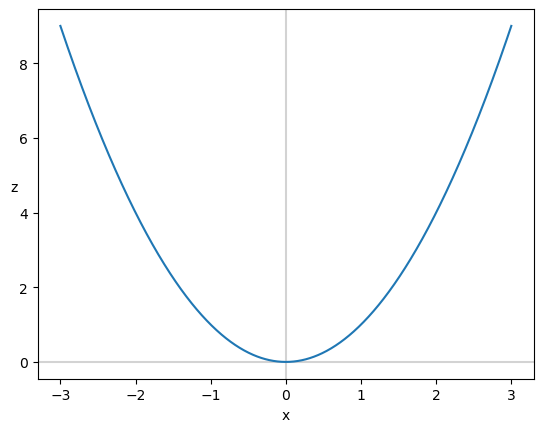

In [5]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)


To determine the slope of z w.r.t. x at a given point along the curve, we can use the partial derivative from the slides:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>z</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>x</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mn>2</mn>
  <mi>x</mi>
</math>

In [6]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative; it often would be
    return 2*my_x

In [8]:
x_samples = [-2, -1, 0, 1, 2]
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [9]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y) 
    plt.scatter(my_x, my_z, c=col, zorder=3) 
    
    tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3)

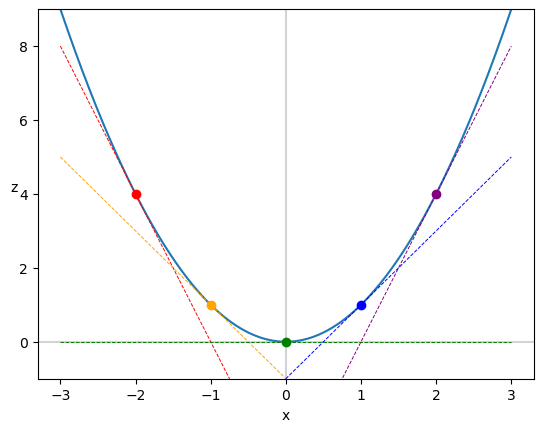

In [10]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Thereby visually demonstrating:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>z</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>x</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mn>2</mn>
  <mi>x</mi>
</math>

That is, the slope of z along the x axis is twice the x value.

Now let's plot  with respect to y by varying y..

In [11]:
ys = np.linspace(-3, 3, 1000)

...while holding x constant (e.g., at x = 0):

In [12]:
zs_wrt_y = f(0, ys)

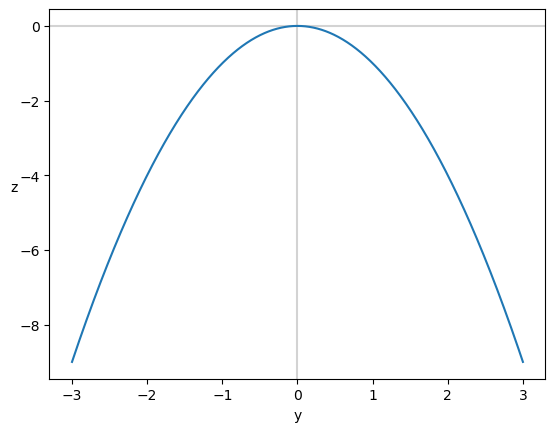

In [13]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

As in the slides, the partial derivative of z w.r.t y happens to be independent of x (just as we observed x is independent of y above), so while z varies as a function of both x and y, the slope of z w.r.t y is the same no matter what x is:
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>z</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>y</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mn>2</mn>
  <mi>y</mi>
</math>

So for example, holding x constant at 2 instead of 0 increases , but has no impact whatsoever on the slope of z w.r.t. :

In [14]:
zs_wrt_y = f(2, ys)

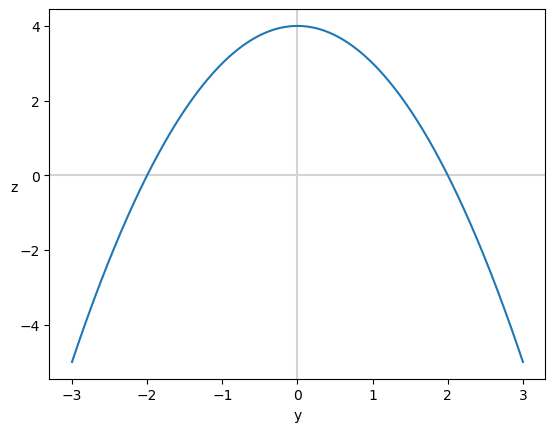

In [15]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [16]:
def delz_dely(my_x, my_y):
    return -2*my_y

In [17]:
y_samples = [-2, -1, 0, 1, 2]

In [18]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

    my_z = my_f(my_x, my_y) 
    plt.scatter(my_y, my_z, c=col, zorder=3) # changed my_x to my_y
    
    tangent_m = fprime(my_x, my_y) 
    tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
    tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys
    
    plt.plot(my_ys, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

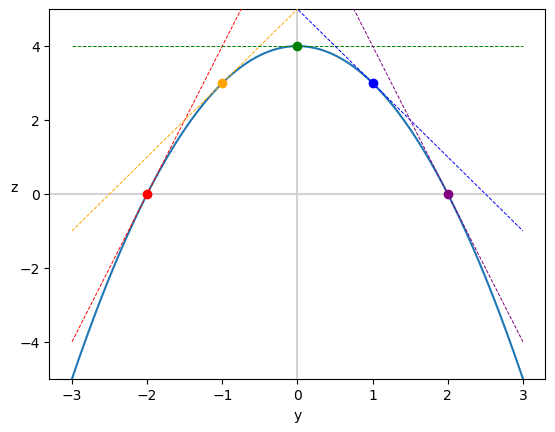

In [19]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Thereby visually demonstrating 
 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>z</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>y</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mn>2</mn>
  <mi>y</mi>
</math>
.

That is, the slope of z along the y axis is twice the y value and inverted, resulting in the parabolic curve opening downward.

In [21]:
x = torch.tensor(0.).requires_grad_() 
x

tensor(0., requires_grad=True)

In [22]:
y = torch.tensor(0.).requires_grad_() 
y

tensor(0., requires_grad=True)

In [23]:
z = f(x, y) # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [24]:
z.backward() # Autodiff

As we already knew from our exercises above, the slope of the point (0, 0, 0) is zero with respect to both the x and y axes:

In [25]:
x.grad

tensor(0.)

In [26]:
y.grad

tensor(-0.)

### Partial Derivatives of a Cylinder's Volume

The volume of a cylinder is described by <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>v</mi>
  <mo>=</mo>
  <mi>&#x3C0;</mi>
  <msup>
    <mi>r</mi>
    <mn>2</mn>
  </msup>
  <mi>l</mi>
</math>
 where:

* r is the radius of the cylinder
* l is its length

In [31]:
import math

def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l

In [28]:
# Let's say the radius is 3 meters...
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [29]:
# ...and length is 5 meters:
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [32]:
# Then the volume of the cylinder is 141.4 cubic meters: 
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [33]:
v.backward()

As derived on the slides:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>v</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>l</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mi>&#x3C0;</mi>
  <msup>
    <mi>r</mi>
    <mn>2</mn>
  </msup>
</math>

In [34]:
math.pi * 3**2

28.274333882308138

This means that with <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>r</mi>
  <mo>=</mo>
  <mn>3</mn>
</math>, a change in  by one unit corresponds to a change in  of 28.27
. We can prove this to ourselves:

In [35]:
cylinder_vol(3, 6)

169.64600329384882

In [36]:
cylinder_vol(3, 6) - cylinder_vol(3, 5)

28.274333882308127

In [37]:
cylinder_vol(3, 7) - cylinder_vol(3, 6)

28.274333882308156

## Gradient of a Single-Point Regression

we calculate the gradient of quadratic cost with respect to a straight-line regression model's parameters. We keep the partial derivatives as simple as possible by limiting the model to handling a single data point.

Let's use the same data as we did in the Regression in PyTorch notebook as well as for demonstrating the Moore-Penrose Pseudoinverse 

In [38]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])

In [39]:
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

The slope of a line is given by <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>=</mo>
  <mi>m</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
</math>:

In [40]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

Let's initialize m and b with the same "random" near-zero values as we did in the Regression in PyTorch notebook:

In [41]:
m = torch.tensor([0.9]).requires_grad_()

In [42]:
b = torch.tensor([0.1]).requires_grad_()

To keep the partial derivatives as simple as possible, let's move forward with a single instance `i` from the eight possible data points:

In [43]:
i = 7
x = xs[i]
y = ys[i]

In [44]:
x

tensor(7.)

In [45]:
y

tensor(-1.3700)

**Step 1:** Forward pass


We can flow the scalar tensor x through our regression model to produce <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
</math>
, an estimate of y. Prior to any model training, this is an arbitrary estimate:

In [46]:
yhat = regression(x, m, b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

Step 2: Compare <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
</math>
 with true y to calculate cost C

In the Regression in PyTorch notebook, we used mean-squared error, which averages quadratic cost over multiple data points. With a single data point, here we can use quadratic cost alone. It is defined by:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>C</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
</math>

In [48]:
# Quadratic cost calculating fuction
def squared_error(my_yhat, my_y):
    return (my_yhat - my_y)**2

In [49]:
C = squared_error(yhat, y)
C

tensor([60.3729], grad_fn=<PowBackward0>)

**Step 3:** Use autodiff to calculate gradient of C w.r.t. parameters

In [50]:
C.backward()

The partial derivative of C with respect to m (<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>m</mi>
    </mrow>
  </mfrac>
</math>) is:

In [51]:
m.grad

tensor([108.7800])

And the partial derivative of C with respect to b (
 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>b</mi>
    </mrow>
  </mfrac>
</math>
) is:

In [52]:
b.grad

tensor([15.5400])

The relation between Cost Function w.r.t the variable m is derived by this equation:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>m</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mn>2</mn>
  <mi>x</mi>
  <mo stretchy="false">(</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
</math>

In [54]:
# In simple math
2*x*(yhat.item()-y)

tensor(108.7800)

The relation between Cost Function w.r.t the variable b is derived by this equation:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>b</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mn>2</mn>
  <mo stretchy="false">(</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
</math>

In [55]:
2*(yhat.item()-y)

tensor(15.5400)

## The Gradient of Cost, <math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="normal">&#x2207;</mi><mi>C</mi></math>

The gradient of cost, which is symbolized <math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="normal">&#x2207;</mi><mi>C</mi></math> (pronounced "nabla C"), is a vector of all the partial derivatives of C with respect to each of the individual model parameters:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi mathvariant="normal">&#x2207;</mi>
  <mi>C</mi>
  <mo>=</mo>
  <msub>
    <mi mathvariant="normal">&#x2207;</mi>
    <mi>p</mi>
  </msub>
  <mi>C</mi>
  <mo>=</mo>
  <msup>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">[</mo>
      <mfrac>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>C</mi>
          </mrow>
        </mrow>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <msub>
              <mi>p</mi>
              <mn>1</mn>
            </msub>
          </mrow>
        </mrow>
      </mfrac>
      <mo>,</mo>
      <mfrac>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>C</mi>
          </mrow>
        </mrow>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <msub>
              <mi>p</mi>
              <mn>2</mn>
            </msub>
          </mrow>
        </mrow>
      </mfrac>
      <mo>,</mo>
      <mo>&#x22EF;</mo>
      <mo>,</mo>
      <mfrac>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>C</mi>
          </mrow>
        </mrow>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <msub>
              <mi>p</mi>
              <mi>n</mi>
            </msub>
          </mrow>
        </mrow>
      </mfrac>
      <mo data-mjx-texclass="CLOSE">]</mo>
    </mrow>
    <mi>T</mi>
  </msup>
</math>

In this case, there are only two parameters, b and m:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi mathvariant="normal">&#x2207;</mi>
  <mi>C</mi>
  <mo>=</mo>
  <msup>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">[</mo>
      <mfrac>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>C</mi>
          </mrow>
        </mrow>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>b</mi>
          </mrow>
        </mrow>
      </mfrac>
      <mo>,</mo>
      <mfrac>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>C</mi>
          </mrow>
        </mrow>
        <mrow>
          <mi>&#x2202;</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>m</mi>
          </mrow>
        </mrow>
      </mfrac>
      <mo data-mjx-texclass="CLOSE">]</mo>
    </mrow>
    <mi>T</mi>
  </msup>
</math>

In [56]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 15.5400],
        [108.7800]])

# Gradient of Cost on a Batch of Data

we expand on the partial derivative calculus of the Single Point Regression Gradient notebook to:

* Calculate the gradient of mean squared error on a batch of data
* Visualize gradient descent in action

In [57]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [58]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [59]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

**Step 1:** Forward pass

In [60]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

Step 2: Compare <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
</math>
 with true y to calculate cost C

 let's use mean squared error, which averages quadratic cost across multiple data points:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>C</mi>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mi>n</mi>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mi>n</mi>
  </munderover>
  <mo stretchy="false">(</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <msub>
        <mi>y</mi>
        <mi>i</mi>
      </msub>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo>&#x2212;</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
</math>

In [61]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [62]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

Step 3: Use autodiff to calculate gradient of C w.r.t. parameters

In [63]:
C.backward()

In [64]:
m.grad

tensor([36.3050])

In [65]:
b.grad

tensor([6.2650])

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>m</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mn>2</mn>
    <mi>n</mi>
  </mfrac>
  <mo data-mjx-texclass="OP">&#x2211;</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>&#x22C5;</mo>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
</math>

In [66]:
2*1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>b</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mn>2</mn>
    <mi>n</mi>
  </mfrac>
  <mo data-mjx-texclass="OP">&#x2211;</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math>

In [68]:
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

We don't need to explicitly create a standalone  object (Greek inverted delta is called nabla for "harp" but w.r.t. gradient is del as in "del C") for the remainder of the code in this notebook to run, but let's create it for fun now anyway and we'll make use of it in a later, related notebook:

In [69]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])


Let's visualize the most pertinent metrics in a single plot:

In [70]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())        
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

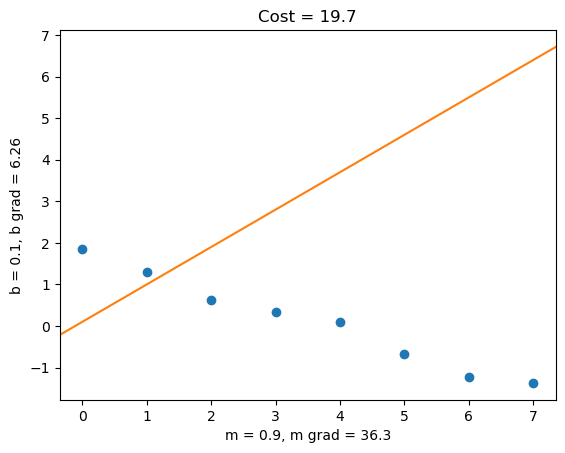

In [71]:
labeled_regression_plot(xs, ys, m, b, C)

**Step 4:** Gradient descent


 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>m</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mn>36.3</mn>
</math> indicates that an increase in m corresponds to a large increase in C.

Meanwhile, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>b</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mn>6.26</mn>
</math>
 
 indicates that an increase in b also corresponds to an increase in C, though much less so than m.

In the first round of training, the lowest hanging fruit with respect to reducing cost C is therefore to decrease the slope of the regression line, m. There will also be a relatively small decrease in the -intercept of the line, b.

In [72]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [73]:
optimizer.step()

In [74]:
C = mse(regression(xs, m, b), ys)

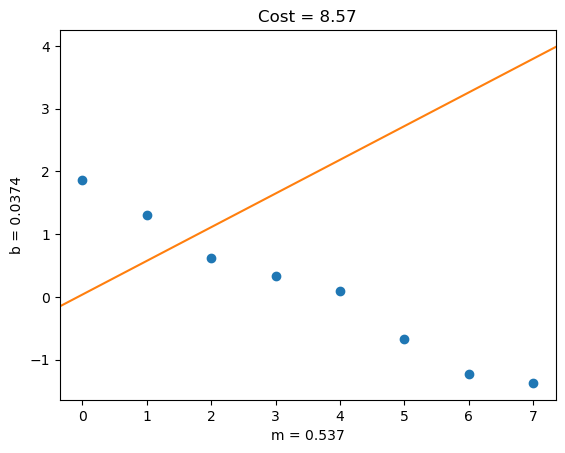

In [75]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C hasn't been recalculated

#### Repeat
Observe further rounds of training:

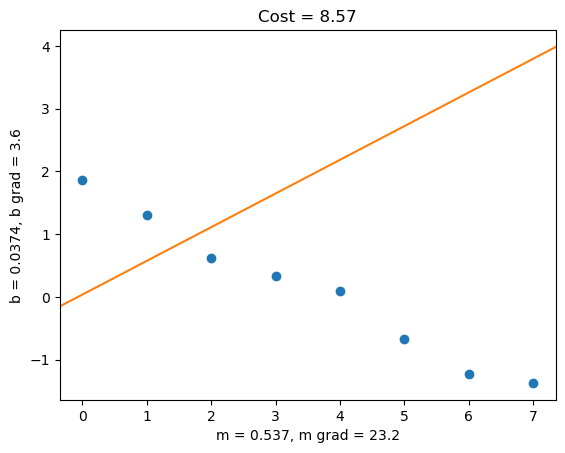

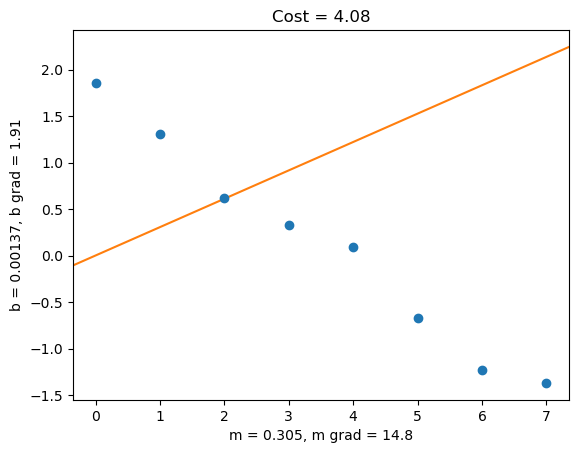

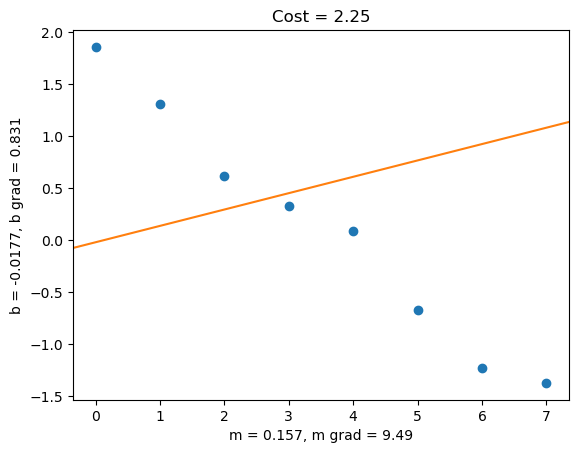

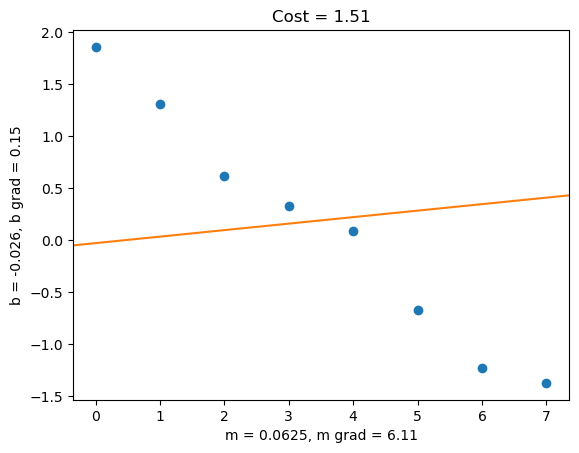

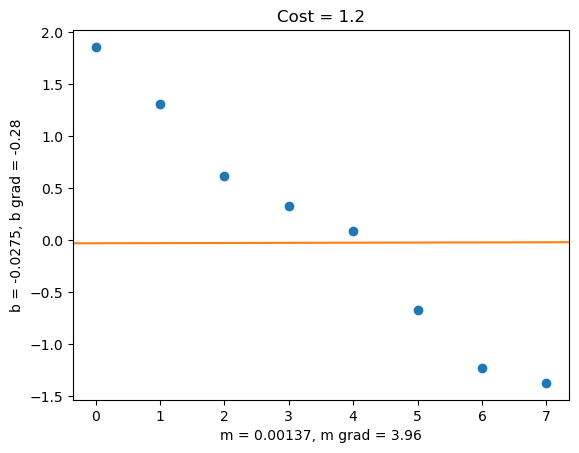

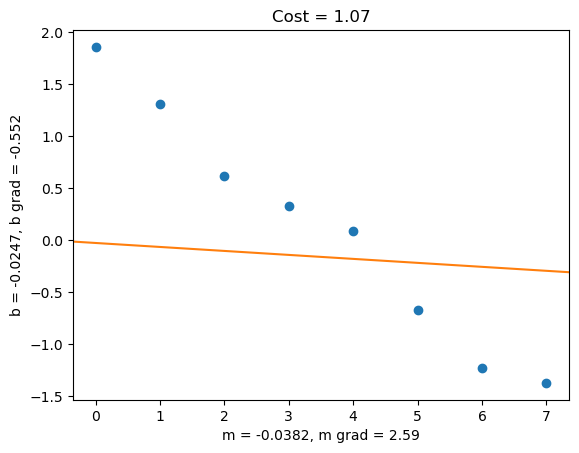

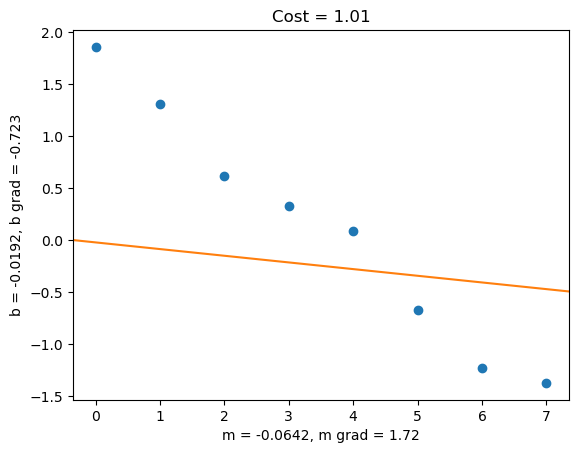

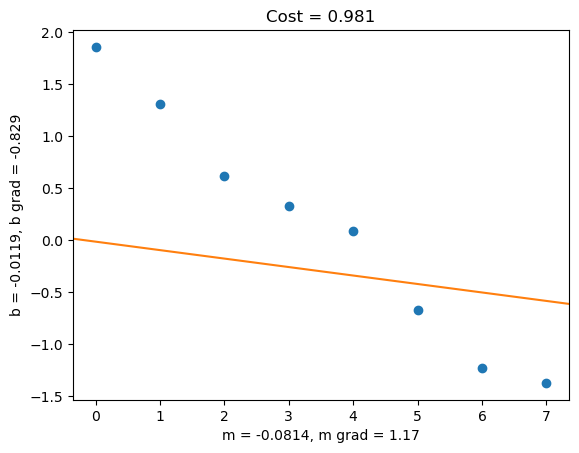

In [76]:
epochs = 8
for epoch in range(epochs): 
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    labeled_regression_plot(xs, ys, m, b, C)
    
    optimizer.step() # Step 4

In later rounds of training, after the model's slope m has become closer to the slope represented by the data, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>b</mi>
    </mrow>
  </mfrac>
</math>
 
 becomes negative, indicating an inverse relationship between b and C. Meanwhile, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>m</mi>
    </mrow>
  </mfrac>
</math>
 
 remains positive.

This combination directs gradient descent to simultaneously adjust the y-intercept b upwards and the slope m downwards in order to reduce cost C and, ultimately, fit the regression line snugly to the data.